In [3]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [4]:
# Read in the data from the csv file
water_data = pd.read_csv('City_of_Fort_Collins_Water_Quality.csv')
water_data.head()

,Datenum,Date,Poudre Inf Flow (%),Horsetooth Inf Flow (%),Washwater Return Inf Flow (%),Poudre Temp (C),Poudre pH,Poudre Turb (NTU),Poudre DO (mg/l),Horsetooth Temp (C),Horsetooth pH,Horsetooth Turb (NTU),Horsetooth DO (mg/L),Finished Water Temp (C),Finished Water pH,Finished Water Turb (NTU),Finished Water Alk (mg/L),Finished Water Cl2 Res (mg/L),Notes
0,20100101,01-Jan-2010,0.643,0.328,0.029,0.87,7.88,0.67,12.36,5.98,7.59,4.53,9.88,2.01,8.05,0.03,41.35,0.80,NaN
1,20100102,02-Jan-2010,0.709,0.242,0.050,0.74,8.07,0.73,12.38,6.00,7.60,4.41,9.86,1.82,8.00,0.03,40.99,0.76,NaN
2,20100103,03-Jan-2010,0.654,0.296,0.050,0.72,8.06,0.74,12.38,6.06,7.59,4.45,9.84,1.85,7.97,0.03,40.31,0.74,NaN
3,20100104,04-Jan-2010,0.577,0.359,0.064,0.70,7.75,0.75,12.35,6.17,7.61,4.42,9.87,1.97,8.02,0.03,38.55,0.75,NaN
4,20100105,05-Jan-2010,0.598,0.337,0.065,0.70,7.51,0.58,10.36,7.11,7.59,4.41,9.79,1.92,7.94,0.03,37.96,0.76,NaN


In [5]:
# Drop N/A values
clean_data = water_data.dropna()
clean_data.head()

,Datenum,Date,Poudre Inf Flow (%),Horsetooth Inf Flow (%),Washwater Return Inf Flow (%),Poudre Temp (C),Poudre pH,Poudre Turb (NTU),Poudre DO (mg/l),Horsetooth Temp (C),Horsetooth pH,Horsetooth Turb (NTU),Horsetooth DO (mg/L),Finished Water Temp (C),Finished Water pH,Finished Water Turb (NTU),Finished Water Alk (mg/L),Finished Water Cl2 Res (mg/L),Notes
990,20120917,17-Sep-2012,0.100,0.900,0.0,16.37,7.54,27.16,7.85,16.75,7.13,4.35,2.72,16.62,7.72,0.03,37.81,0.77,Data Validated 12:02 KDM
993,20120920,20-Sep-2012,0.106,0.894,0.0,14.97,7.70,5.23,11.53,17.32,7.16,4.16,3.13,17.02,8.04,0.02,40.41,0.81,Data validated 1216 hrs. (GLJ)
997,20120924,24-Sep-2012,0.113,0.887,0.0,14.85,7.59,3.41,11.40,17.81,7.39,4.38,5.76,17.56,7.96,0.02,39.60,0.77,Data validated 0817 hrs. (GLJ)
998,20120925,25-Sep-2012,0.137,0.863,0.0,14.69,7.55,4.35,11.23,17.70,7.44,4.79,6.34,17.59,7.95,0.03,39.49,0.71,Data validated @ 1239 hrs. (GLJ)
1004,20121001,01-Oct-2012,0.153,0.847,0.0,14.76,7.49,15.32,9.83,17.05,7.55,4.21,7.32,17.05,7.96,0.02,37.91,0.76,Data validated @ 0725 hrs. (GLJ)


In [6]:
# X and y assigned for pH
X = clean_data["Poudre pH"].values.reshape(-1,1)
y = clean_data["Finished Water pH"].values.reshape(-1,1)

X1 = clean_data["Horsetooth pH"].values.reshape(-1,1)
y1 = clean_data["Finished Water pH"].values.reshape(-1,1)

print("Shape: ", X.shape, y.shape, X1.shape, y1.shape)

Shape:  (390, 1) (390, 1) (390, 1) (390, 1)


In [7]:
# X and y assigned for turbidity
X2 = clean_data["Poudre Turb (NTU)"].values.reshape(-1,1)
y2 = clean_data["Finished Water Turb (NTU)"].values.reshape(-1,1)

X3 = clean_data["Horsetooth Turb (NTU)"].values.reshape(-1,1)
y3 = clean_data["Finished Water Turb (NTU)"].values.reshape(-1,1)

print("Shape: ", X2.shape, y2.shape, X3.shape, y3.shape)

Shape:  (390, 1) (390, 1) (390, 1) (390, 1)


In [8]:
# X and y assigned for temperature
X4 = clean_data["Poudre Temp (C)"].values.reshape(-1,1)
y4 = clean_data["Finished Water Temp (C)"].values.reshape(-1,1)

X5 = clean_data["Horsetooth Temp (C)"].values.reshape(-1,1)
y5 = clean_data["Finished Water Temp (C)"].values.reshape(-1,1)

print("Shape: ", X4.shape, y4.shape, X5.shape, y5.shape)

Shape:  (390, 1) (390, 1) (390, 1) (390, 1)


In [9]:
# Split data into test/train
X_train, X_test, y_train, y_test, = train_test_split(X,y,random_state=42)
X1_train, X1_test, y1_train, y1_test, = train_test_split(X1,y1,random_state=42)

X2_train, X2_test, y2_train, y2_test, = train_test_split(X2,y2,random_state=42)
X3_train, X3_test, y3_train, y3_test, = train_test_split(X3,y3,random_state=42)

X4_train, X4_test, y4_train, y4_test, = train_test_split(X4,y4,random_state=42)
X5_train, X5_test, y5_train, y5_test, = train_test_split(X5,y5,random_state=42)

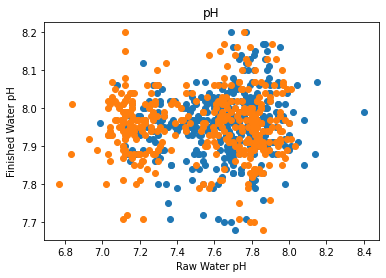

<Figure size 432x288 with 0 Axes>

In [10]:
# Plot the x and y values that were assigned
plt.scatter(X, y)
plt.scatter(X1, y1)
plt.xlabel("Raw Water pH")
plt.ylabel("Finished Water pH")
plt.title("pH")
plt.show()
plt.savefig("Images/pH.png")

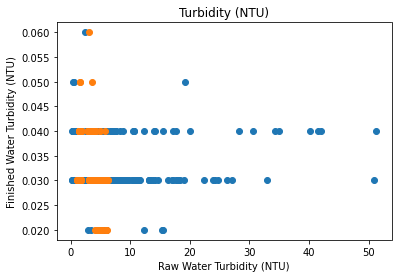

<Figure size 432x288 with 0 Axes>

In [59]:
plt.scatter(X2, y2)
plt.scatter(X3, y3)
plt.xlabel("Raw Water Turbidity (NTU)")
plt.ylabel("Finished Water Turbidity (NTU)")
plt.title("Turbidity (NTU)")
plt.show()
plt.savefig("Images/turbidity.png")

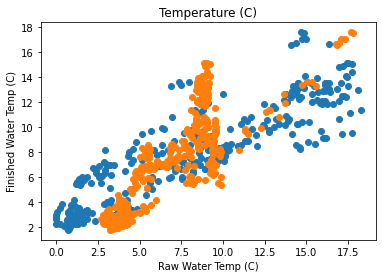

<Figure size 432x288 with 0 Axes>

In [62]:
plt.scatter(X4, y4)
plt.scatter(X5, y5)
plt.xlabel("Raw Water Temp (C)")
plt.ylabel("Finished Water Temp (C)")
plt.title("Temperature (C)")
plt.show()
plt.savefig("Images/temperature.png")

In [29]:
# LinearRegression used to create model and fit it
model = LinearRegression()
model.fit(X_train, y_train)
model.fit(X1_train, y1_train)


LinearRegression()

In [30]:
model.fit(X2_train, y2_train)
model.fit(X3_train, y3_train)


LinearRegression()

In [31]:
model.fit(X4_train, y4_train)
model.fit(X5_train, y5_train)

LinearRegression()

In [32]:
# Model used to make predictions
predicted = model.predict(X_test)
predicted1 = model.predict(X1_test)

In [33]:
predicted2 = model.predict(X2_test)
predicted3 = model.predict(X3_test)

In [34]:
predicted4 = model.predict(X4_test)
predicted5 = model.predict(X5_test)

In [36]:
# Prediction scores using Mean_Squared_Error
pH_P_F_mse = mean_squared_error(y_test, predicted)
pH_H_F_mse = mean_squared_error(y1_test, predicted1)

In [37]:
turb_P_F_mse = mean_squared_error(y2_test, predicted2)
turb_H_F_mse = mean_squared_error(y3_test, predicted3)

In [38]:
temp_P_F_mse = mean_squared_error(y4_test, predicted4)
temp_H_F_mse = mean_squared_error(y5_test, predicted5)

In [39]:
# Prediction scores using r^2
pH_P_F_r2 = r2_score(y_test, predicted)
pH_H_F_r2 = r2_score(y1_test, predicted1)

In [40]:
turb_P_F_r2 = r2_score(y2_test, predicted2)
turb_H_F_r2 = r2_score(y3_test, predicted3)

In [41]:
temp_P_F_r2 = r2_score(y4_test, predicted4)
temp_H_F_r2 = r2_score(y5_test, predicted5)

In [44]:
# Print Mean_Square_Error values
print(f"Poudre/Horsetooth pH Mean Squared Error (MSE): {round(pH_P_F_mse,4)} and {round(pH_H_F_mse,4)}")
print(f"Poudre/Horsetooth turbidity Mean Squared Error (MSE): {round(turb_P_F_mse,4)} and {round(turb_H_F_mse,4)}")
print(f"Poudre/Horsetooth Temp Mean Squared Error (MSE): {round(temp_P_F_mse,4)} and {round(temp_H_F_mse,4)}")

Poudre/Horsetooth pH Mean Squared Error (MSE): 0.0985 and 0.1279
Poudre/Horsetooth turbidity Mean Squared Error (MSE): 91.8468 and 16.3984
Poudre/Horsetooth Temp Mean Squared Error (MSE): 13.2818 and 4.9891


In [45]:
# Print r^2 values
print(f"Poudre/Horsetooth pH r^2: {round(pH_P_F_r2,4)} and {round(pH_H_F_r2,4)}")
print(f"Poudre/Horsetooth turbidity r^2: {round(turb_P_F_r2,4)} and {round(turb_H_F_r2,4)}")
print(f"Poudre/Horsetooth Temp r^2: {round(temp_P_F_r2,4)} and {round(temp_H_F_r2,4)}")

Poudre/Horsetooth pH r^2: -16.2153 and -21.3628
Poudre/Horsetooth turbidity r^2: -5000548.1748 and -892801.67
Poudre/Horsetooth Temp r^2: 0.1734 and 0.6895


In [46]:
# Call 'score' method to confirm r2 score
model.score(X_test, y_test)

-16.21525163699633

In [47]:
model.score(X1_test, y1_test)

-21.362814611828004

In [52]:
model.score(X2_test, y2_test)

-5000548.17484565

In [53]:
model.score(X3_test, y3_test)

-892801.6700191833

In [54]:
model.score(X4_test, y4_test)

0.17340035418779365

In [55]:
model.score(X5_test, y5_test)

0.6894991828842991